## Classification - Perceptron Algorithm
ex: plot all the data points try to predict which label it has, algorithm to find the (separating) model line
NOTES on Linear Boundaries in my words: take all the dots on the one side and the dots on the other and find a boundry where the most dots for one class go to on side of the line and the other label on the other 
math: $w_1x_1 + w_2x_2 + b = 0$ for 2D <br>
$w_1x_1 + w_2x_2 + w_3x_3 + b = 0$ for 3D on a plane, weights, bias<br>
all the way to nD would be $x_1 + x_2,...x_n$

GOAL: split the data - maybe start with a random line

### Perceptron - a building block of neural netowrks 
combination of nodes 
- first nodes calculates a linear equation $Wx + b$
- second node applies a step function to the result returning 1 or 0 
 
Perceptrons can act as logical operators like AND, OR, and NOT. You could graph points and see where they fall.
Or you could make a XOR Multi-Layer Perceptron

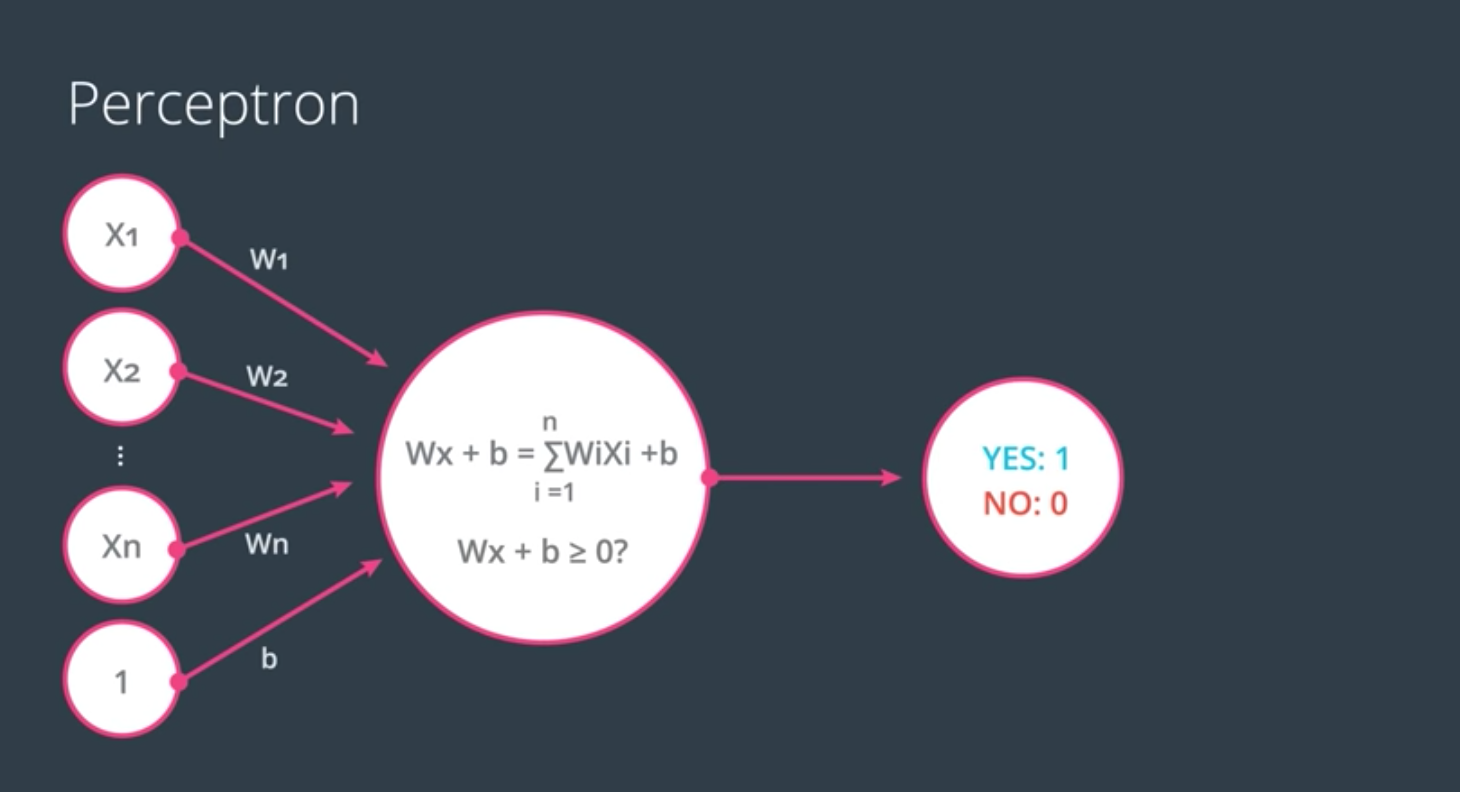
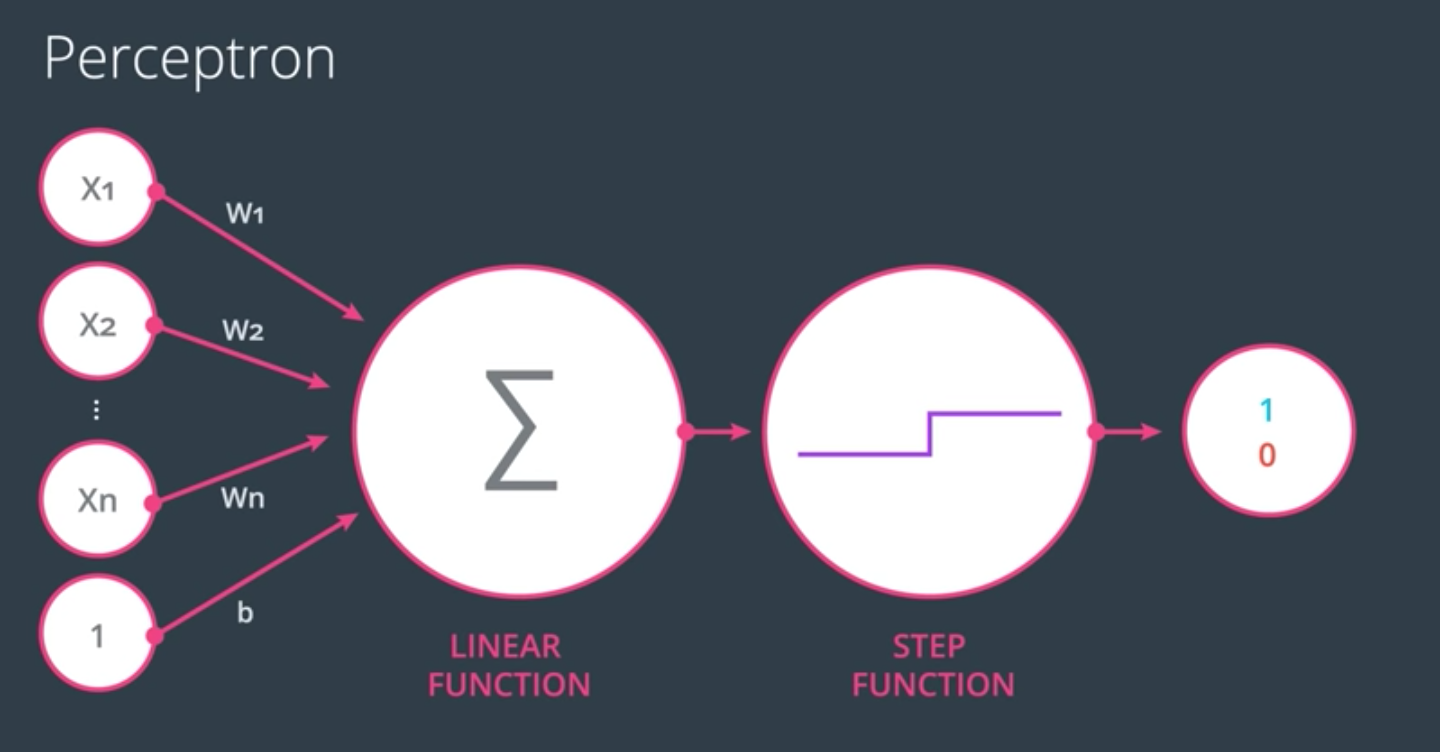
_2 ways of bias- <br>
Bias coming from an input node <br>
2nd way has bias inside the node<br>
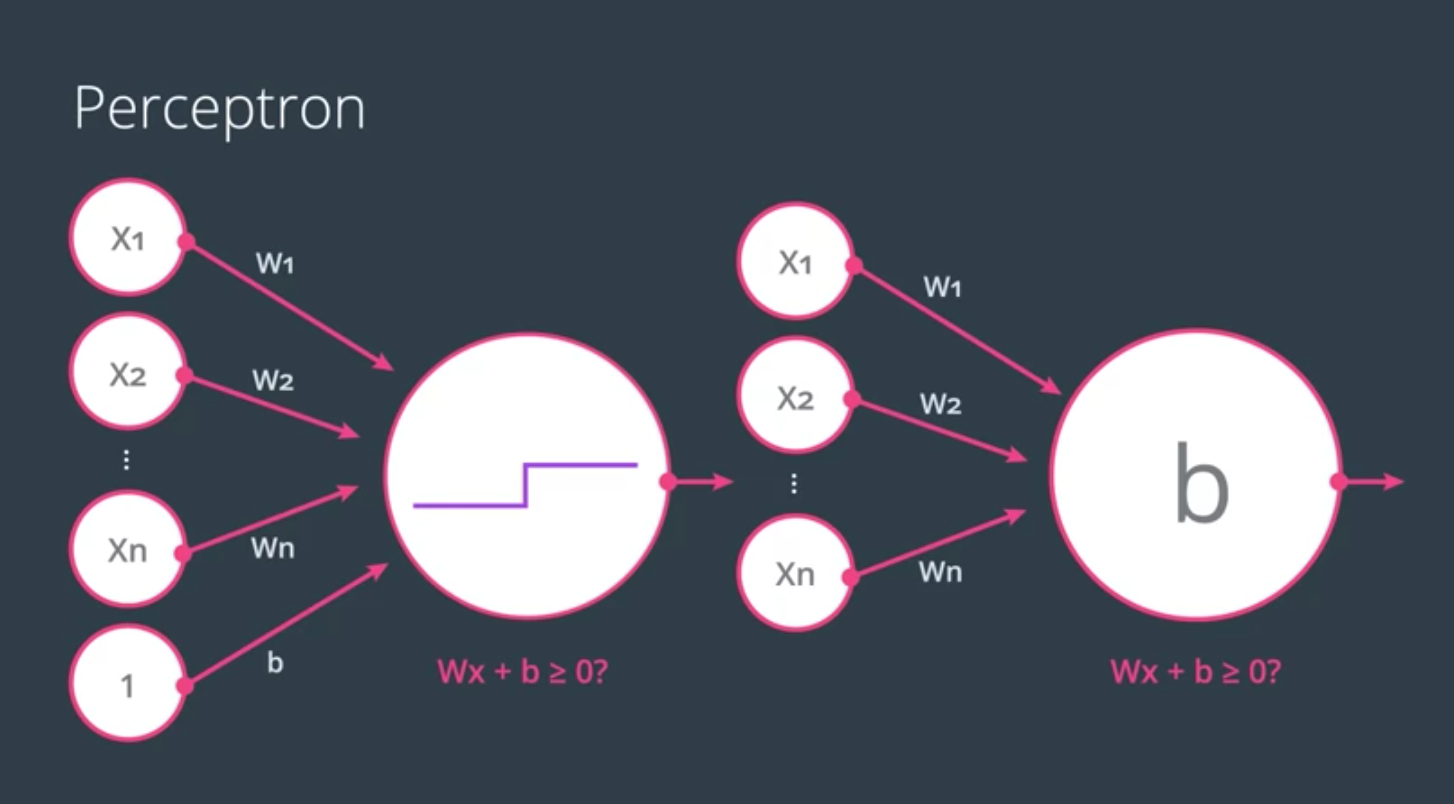
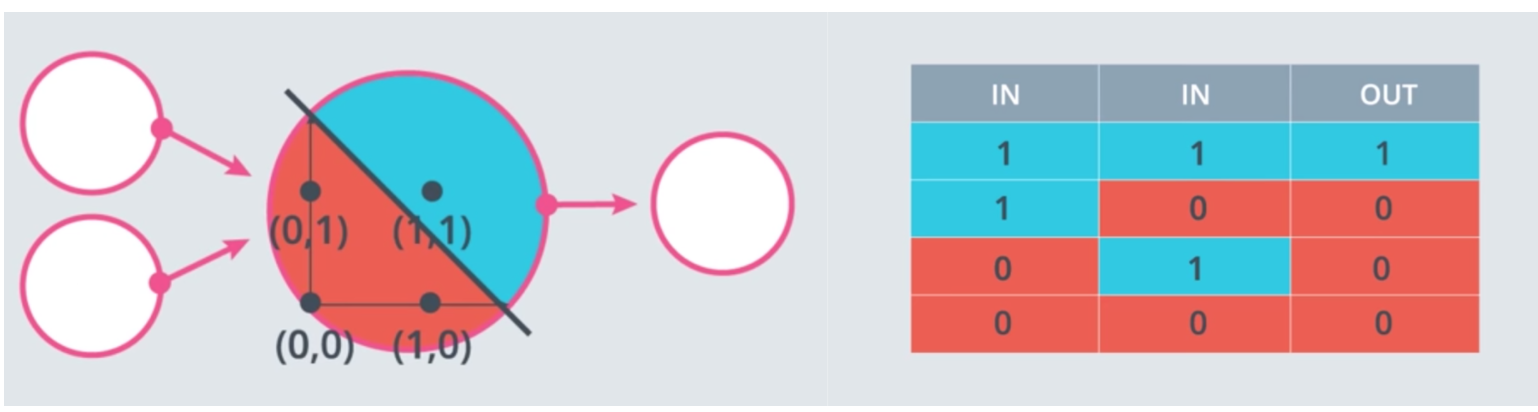

In [32]:
import pandas as pd

# TODO: Set weight1, weight2, and bias
weight1 = 0.9
weight2 = 0.1
bias = -0.2

test = weight1 * 1 + weight2 * 1 + bias
print(test)
# DON'T CHANGE ANYTHING BELOW
# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [False, False, False, True]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))


0.8
You got 1 wrong.  Keep trying!

 Input 1    Input 2    Linear Combination    Activation Output   Is Correct
       0          0                  -0.2                    0          Yes
       0          1                  -0.1                    0          Yes
       1          0                   0.7                    1           No
       1          1                   0.8                    1          Yes


In [34]:
import numpy as np
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

# TODO: Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.

def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b
    
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines
